# Lab 1 - Smart Meter Heatmap

In [1]:
from IPython.display import display
import urllib3
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

This Jupyter notebook provides an example of what you can do using data published on WPD's connected data portal. This specific Lab will walk you through extracting a number of diverse datasets through API calls and visualising them using Python.

### Loading Non-Spatial Data

WPD's connected data portal is a rich and diverse repository of datasets that is constantly growing and evolving. One of the key benefits of the portal is that it enables API requests. One of the datasets we will be utilising for this lab is the smart meter data. 

In [2]:
# Create a PoolManager instance for sending requests.
http = urllib3.PoolManager()

# This is the dataset url
url = 'https://connecteddata.westernpower.co.uk/api/3/action/datastore_search?resource_id=5e531ff5-02ff-48d7-8512-6e603fb569b4&limit=300000'  

# Calls the endpoint
response = http.request('GET',url)

# Use the json module to load CKAN's response into a dictionary.
response_dict = json.loads(response.data)

# Display the response
display(response_dict)

{'help': 'https://connecteddata.westernpower.co.uk/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'limit': 32000,
  'records_format': 'objects',
  'resource_id': '5e531ff5-02ff-48d7-8512-6e603fb569b4',
  'total_estimation_threshold': None,
  'records': [{'_id': 1,
    'GSP': 'Abham  S.G.P.',
    'BSP': 'Paignton Bsp',
    'PRIMARY': 'Blackawton',
    'GSP_NR_ID': 136,
    'BSP_NR_ID': 41,
    'PRIMARY_NR_ID': 313,
    'SMETS1': 89,
    'SMETS2': 185,
    'NON_SMART': 530},
   {'_id': 2,
    'GSP': 'Bridgwater  S.G.P.',
    'BSP': 'Churchill Bsp 132kv',
    'PRIMARY': 'Cheddar',
    'GSP_NR_ID': 135,
    'BSP_NR_ID': 85,
    'PRIMARY_NR_ID': 15094,
    'SMETS1': 466,
    'SMETS2': 774,
    'NON_SMART': 2448},
   {'_id': 3,
    'GSP': 'Bridgwater  S.G.P.',
    'BSP': 'Bridgwater Grid Bsp',
    'PRIMARY': 'Watchfield',
    'GSP_NR_ID': 135,
    'BSP_NR_ID': 127,
    'PRIMARY_NR_ID': 15117,
    'SMETS1': 472,
    'SMETS2': 670,
    'NO

In [3]:
# Construct DataFrame from a dictionary
df = pd.DataFrame(response_dict['result']['records'])

# Set the index to _id 
df.set_index(['_id'],inplace=True)

# Add a column calcualting the percentage of both SMETS1 AND SMETS2 against non-smart meters
df['PCT_SMART']=((df['SMETS1']+df['SMETS2'])/(df['SMETS1']+df['SMETS2']+df['NON_SMART']))*100

# Display the dataframe
display(df)

,GSP,BSP,PRIMARY,GSP_NR_ID,BSP_NR_ID,PRIMARY_NR_ID,SMETS1,SMETS2,NON_SMART,PCT_SMART
_id,,,,,,,,,,
1,Abham S.G.P.,Paignton Bsp,Blackawton,136,41,313,89,185,530,34.079602
2,Bridgwater S.G.P.,Churchill Bsp 132kv,Cheddar,135,85,15094,466,774,2448,33.622560
3,Bridgwater S.G.P.,Bridgwater Grid Bsp,Watchfield,135,127,15117,472,670,2130,34.902200
4,Indian Queens S.G.P.,St Tudy Bsp,Wadebridge,138,24,15276,583,1023,3533,31.251216
5,Indian Queens S.G.P.,Fraddon Bsp,St Mawgan,138,5,15288,175,290,1591,22.616732
...,...,...,...,...,...,...,...,...,...,...
1064,GRENDON 132kV S STN,OAKHAM 33kV S STN,EMPINGHAM 33 11kV S STN,314567,314705,315260,302,497,1362,36.973623
1065,Cellarhead 132kV,WHITFIELD 132 33kV S STN,CHEDDLETON 33 11kV S STN,314563,314726,315287,362,741,2161,33.792892
1066,COVENTRY 132kV S STN,RUGBY 132kV S STN,RUGBY 11kV S STN,314533,314596,314878,889,1940,5157,35.424493


In [4]:
# Generate and display descriptive statistics
display(df.describe())

,GSP_NR_ID,BSP_NR_ID,PRIMARY_NR_ID,SMETS1,SMETS2,NON_SMART,PCT_SMART
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,223798.438728,222380.844715,233747.593078,946.811974,1538.960711,5028.350795,32.491634
std,141413.447996,138838.106361,140446.265689,867.257044,1321.060915,4610.076465,5.992397
min,0.000000,0.000000,219.000000,0.000000,0.000000,4.000000,0.000000
25%,139.000000,217.000000,15286.000000,349.000000,578.000000,2023.000000,29.751511
50%,314533.000000,314586.000000,314892.000000,687.000000,1197.000000,3745.000000,33.532042
75%,314551.000000,314702.000000,315194.000000,1262.000000,2076.000000,6377.000000,36.325208
max,490619.000000,523649.000000,523387.000000,6025.000000,8673.000000,31000.000000,46.905537


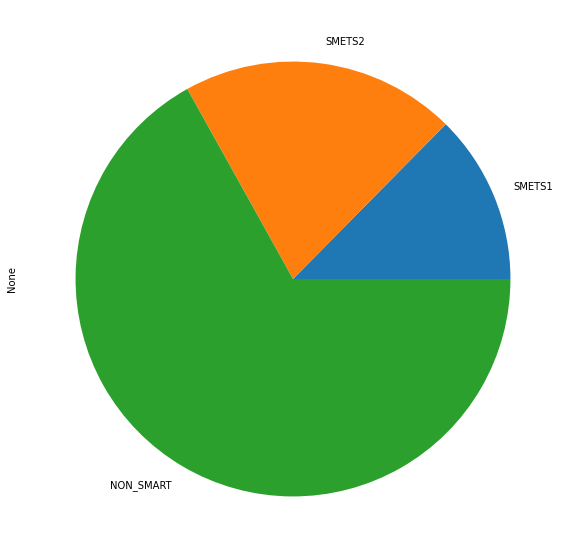

In [5]:
# Only take the Meter data columns and sum along the column axis 
plot_df = df[['SMETS1','SMETS2','NON_SMART']].sum(axis = 0, skipna = True)

# Generate a pie chart and display
plot = plot_df.plot.pie(figsize=(10, 10))

### Loading Spatial Data
The easiest way to get from a file to a quick visualisation of the data is by loading it as a GeoDataFrame and calling the plot command. The main library employed for all of this is geopandas which is a geospatial extension of the pandas library. Geopandas supports exactly the same functionality that pandas does, plus a wide range of spatial counterparts that make manipulation and general "munging" of spatial data as easy as non-spatial tables.

### Polygons
Let us begin with the most common type of spatial data: polygons. For example, we can load the geography of primary electrical supply areas with the following lines of code:

In [6]:
east_mids_gpkg = gpd.read_file("https://connecteddata.westernpower.co.uk/dataset/d8e73301-e26a-4b5f-8eb5-e9a2f1b61338/resource/c0bc2a2d-deda-4dc8-8317-0ec8a24af677/download/east-midlands-primary.gpkg")
south_wales_gpkg = gpd.read_file("https://connecteddata.westernpower.co.uk/dataset/d8e73301-e26a-4b5f-8eb5-e9a2f1b61338/resource/547db41e-fb44-423f-9c71-98266b666c38/download/south-wales-primary.gpkg")
south_west_gpkg = gpd.read_file("https://connecteddata.westernpower.co.uk/dataset/d8e73301-e26a-4b5f-8eb5-e9a2f1b61338/resource/fe4c3f49-7de9-4ebf-bb10-413c50d59f83/download/south-west-primary.gpkg")
west_mids_gpkg = gpd.read_file("https://connecteddata.westernpower.co.uk/dataset/d8e73301-e26a-4b5f-8eb5-e9a2f1b61338/resource/83c22640-3a54-415f-b253-e51bee3bd146/download/west-midlands-primary.gpkg")

Now the gpkg on the portal have been converted into a GeoDataFrame. GeoDataFrames are very similar to a traditional, non-spatial DataFrame, but with an additional column called geometry as shown below:

In [7]:
display(south_wales_gpkg)

,GSP_NRID,BSP_NRID,PRIM_NRID,NR,NAME,geometry
0,245306,245313,245309,600188,Neyland,"MULTIPOLYGON (((194827.368 204821.643, 194636...."
1,245306,245312,245310,600017,Haverfordwest Power Stn,"MULTIPOLYGON (((193226.090 216277.395, 192329...."
2,245306,245312,245304,600076,Brawdy,"MULTIPOLYGON (((195995.931 225221.578, 195588...."
3,245457,245454,253401,530023,Llantarnam Primary,"MULTIPOLYGON (((333950.826 189947.445, 333556...."
4,245306,245312,245305,600232,Steynton,"MULTIPOLYGON (((186672.226 205663.879, 186670...."
...,...,...,...,...,...,...
184,314538,314601,314941,670106,PONTRILAS 66 11kV S STN,"MULTIPOLYGON (((341226.733 225503.874, 341231...."
185,245421,253131,253134,540039,Upper Boat Primary,"MULTIPOLYGON (((312143.497 185407.025, 311864...."
186,245516,245520,253660,520037,Tir John Primary,"MULTIPOLYGON (((268024.298 192016.374, 267253...."
187,245530,245447,253128,550208,Pontllanffraith,"MULTIPOLYGON (((316825.486 194711.595, 316712...."


This allows us to quickly produce a plot by executing the following line:

<AxesSubplot:>

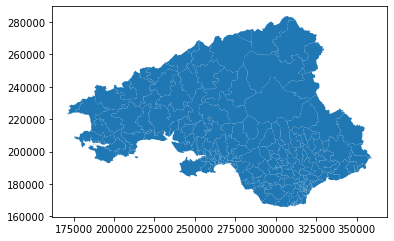

In [8]:
south_wales_gpkg.plot()

This might not be the most aesthetically pleasing visual representation of the primary supply area geography, but it is hard to argue it is not quick to produce. You can also call a single row of the geometry column, it'll return a small plot as shown below:

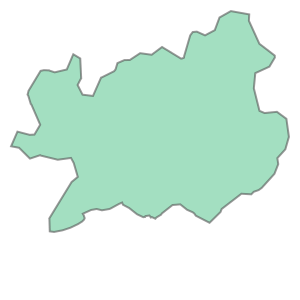

In [9]:
south_wales_gpkg.loc[0, 'geometry']

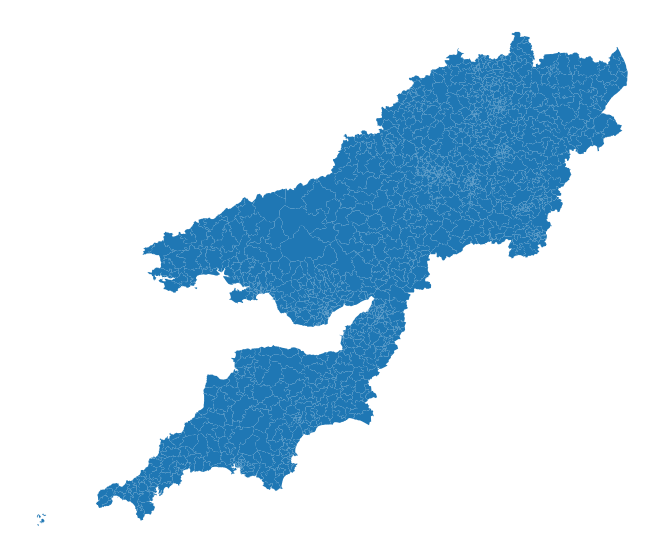

In [10]:
# Create a list containing all 4 licence areas
all_primaries = [east_mids_gpkg,south_wales_gpkg,south_west_gpkg,west_mids_gpkg]

# Create a GeoDataFrame after concatenating all the gpkg into one dataframe
rdf = gpd.GeoDataFrame(pd.concat(all_primaries, ignore_index=True))

# Plot the polygon data, remove axis and resize.
f, ax = plt.subplots(1, figsize=(20, 10))
ax = rdf.plot(ax=ax)
ax.set_axis_off()
plt.show()

### Manipulating Spatial Tables
We have an understanding of how to visually display spatial information, we need to combine the spatial data with non-spatial tabular data. Essentially, the key is to realise that a GeoDataFrame contains most of its spatial information in a single column named geometry, but the rest of it looks and behaves exactly like a non-spatial DataFrame.

Now we have both tables loaded into the session: on the one hand, the spatial data is contained in primary supply areas, while all the tabular data are in df. To be able to work with the two together, we need to connect them. In pandas language, this is called "merge" and the key element in merges are the columns of interest. 

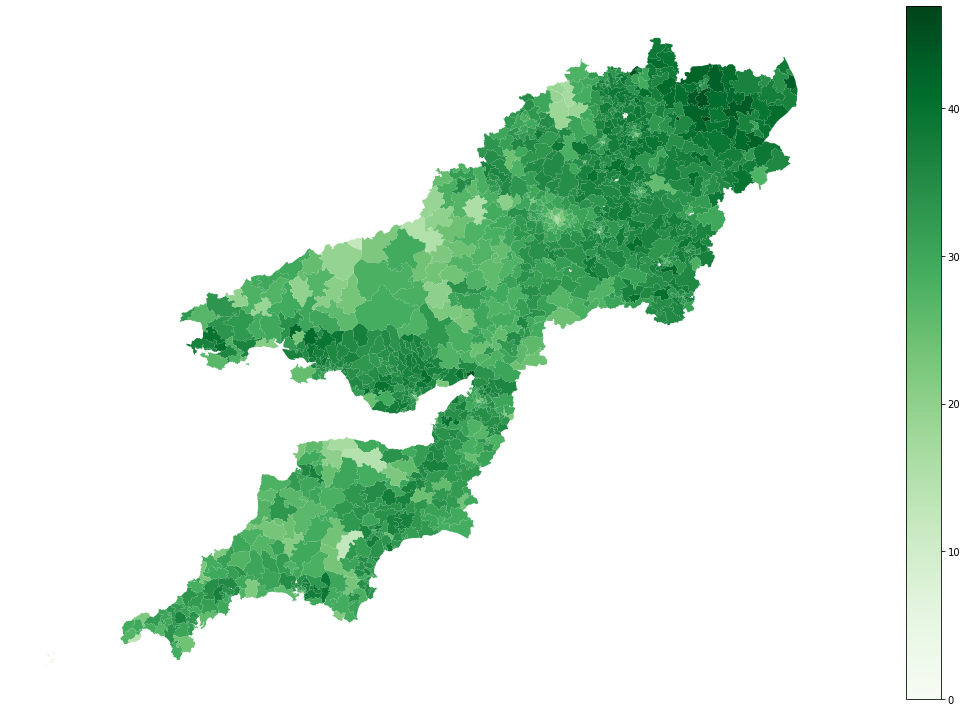

In [11]:
# Merge with `merge` method on shared variable (iso codes):
rdf = rdf.merge(df, left_on='PRIM_NRID',right_on='PRIMARY_NR_ID')

# Plot the polygon data, remove axis and resize.
f, ax = plt.subplots(1, figsize=(20,10))

# Use the PCT_SMART column as the colour scale
ax = rdf.plot(ax=ax,column='PCT_SMART',cmap = "Greens",legend=True)
ax.set_axis_off()
plt.tight_layout()
plt.show()

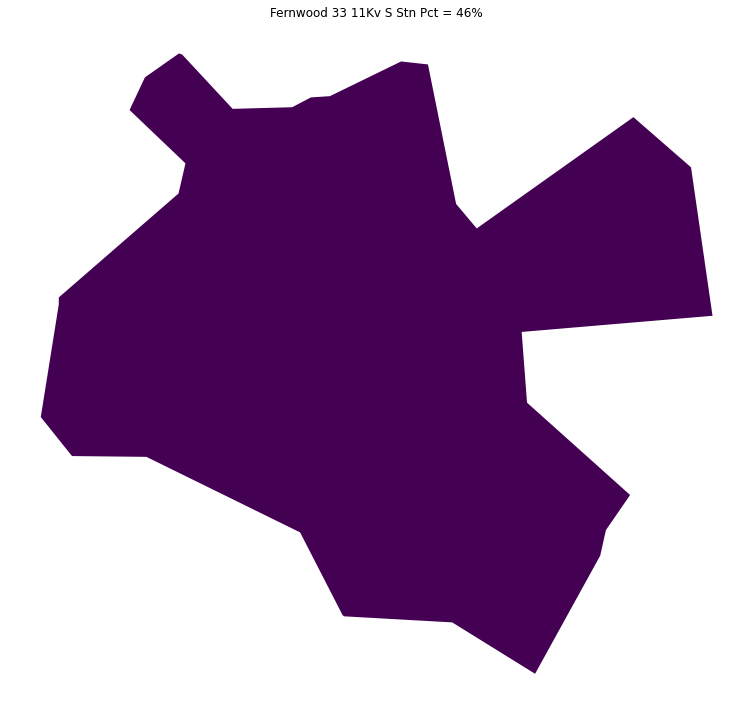

In [22]:
rdf_max =  rdf[rdf.index==rdf.PCT_SMART.idxmax()]

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_title((rdf_max.iloc[0]['NAME']+' pct = '+ str(int(rdf_max.iloc[0]['PCT_SMART'] ))+'%').title())
ax = rdf_max.plot(ax=ax,column='PCT_SMART')
ax.set_axis_off()
plt.tight_layout()
plt.show()